## Below is a breakdown of the methodolgy used to calculate the World Cup challenge contest.

### I began by rearranging the rows from top to bottom for each group, which then allowed me to easily extract each person's results.

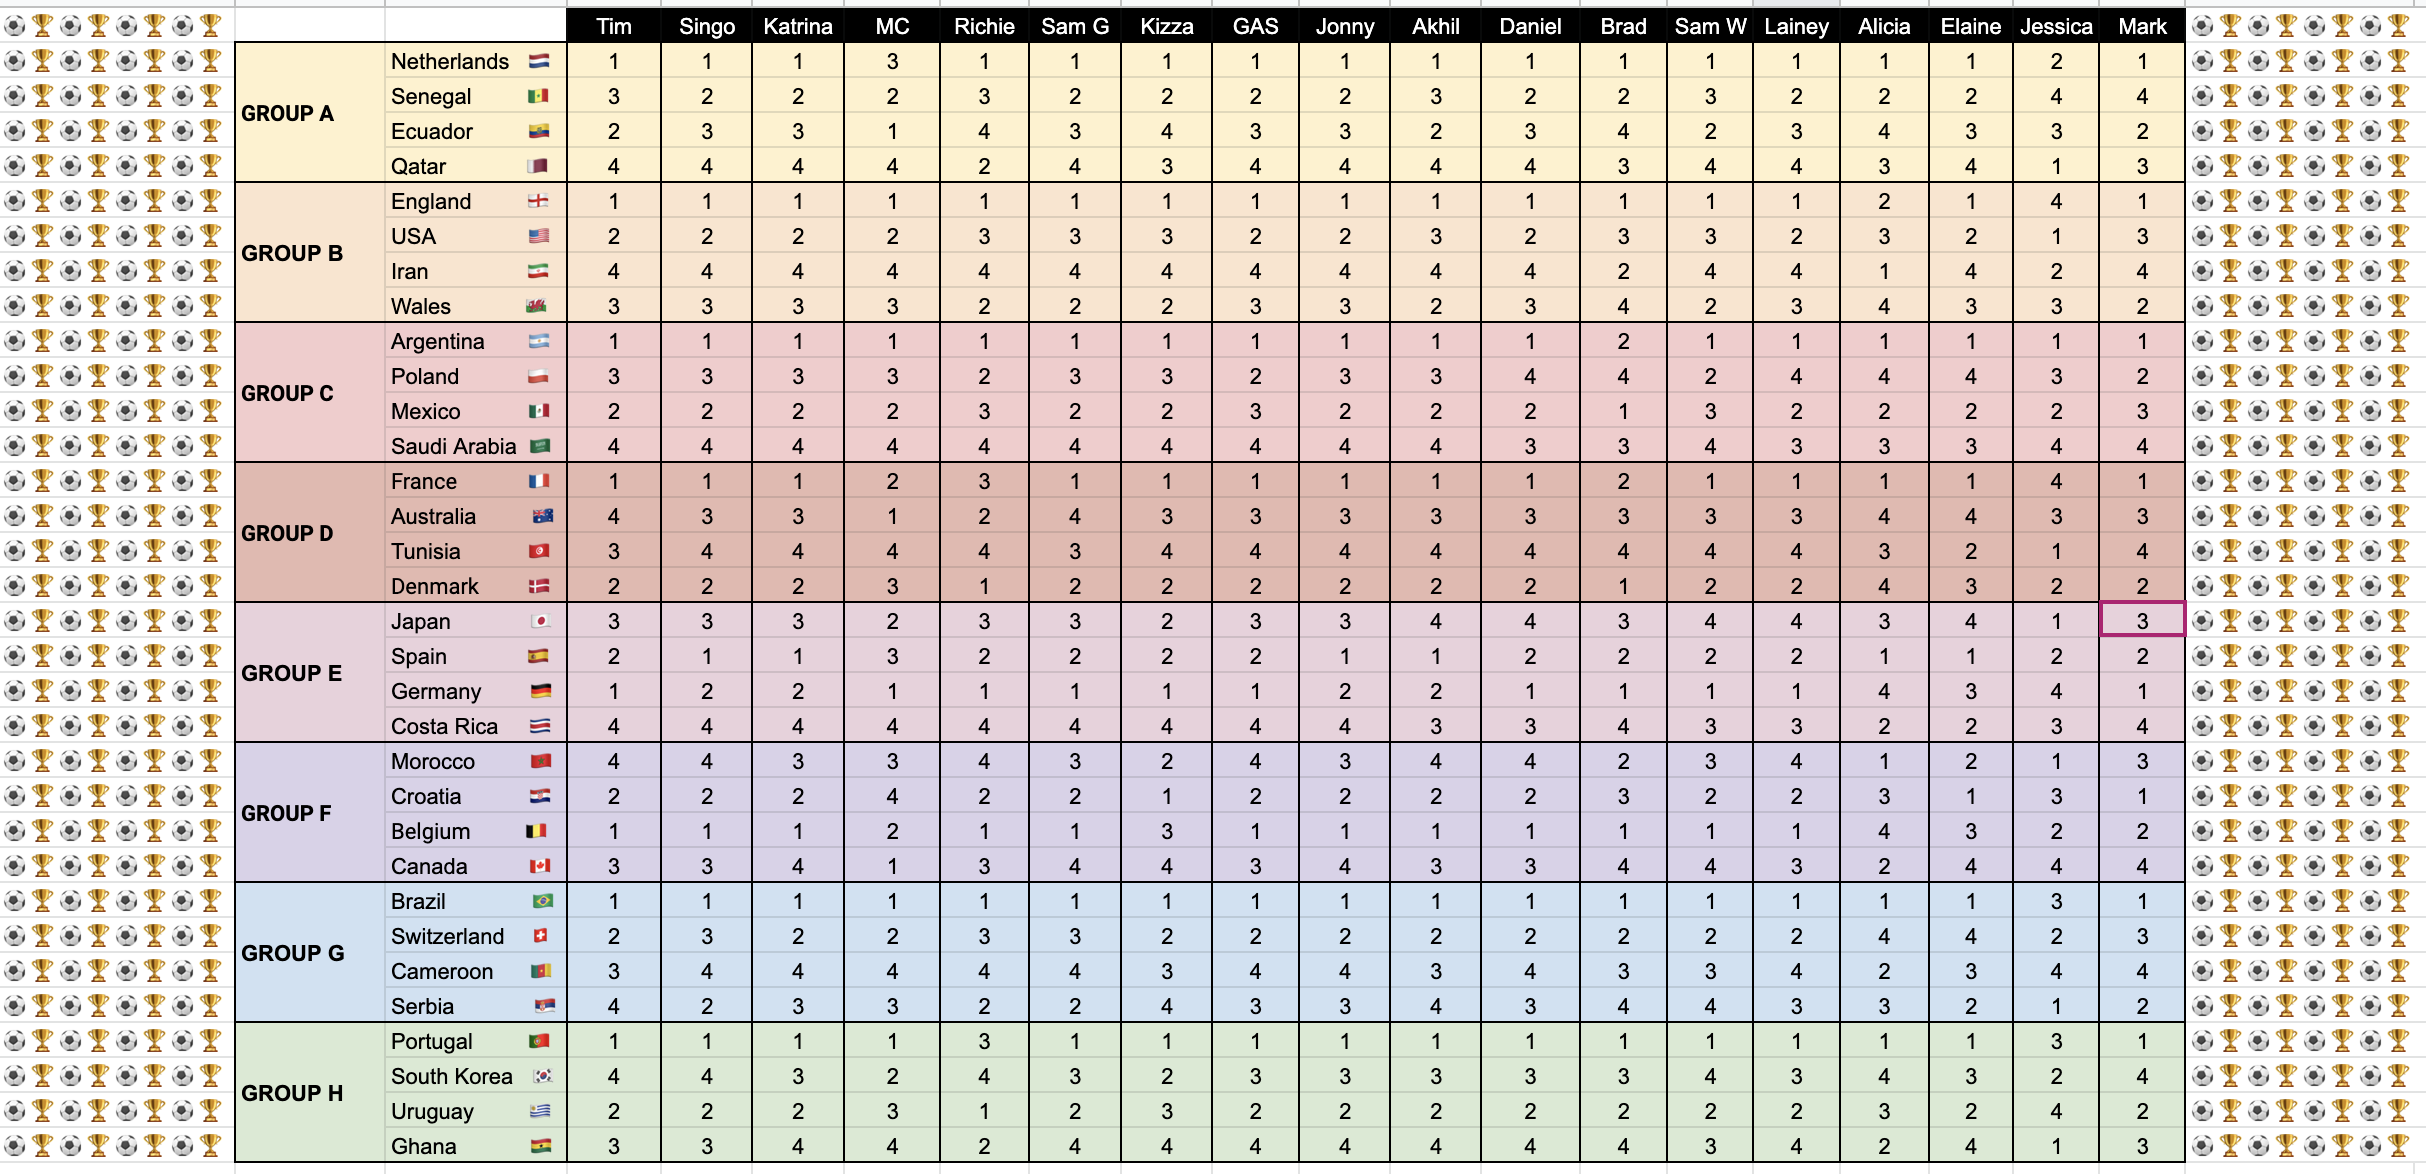

In [6]:
results = {
    "Akhil":   [ [1,3,2,4], [1,3,4,2], [1,3,2,4], [1,3,4,2], [4,1,2,3], [4,2,1,3], [1,2,3,4], [1,3,2,4] ],
    "Alicia":  [ [1,2,4,3], [2,3,1,4], [1,4,2,3], [1,4,3,2], [3,1,4,2], [1,3,4,2], [1,4,2,3], [1,4,3,2] ],
    "Brad":    [ [1,2,4,3], [1,3,2,4], [2,4,1,3], [2,3,4,1], [3,2,1,4], [2,3,1,4], [1,2,3,4], [1,3,2,4] ],
    "Daniel":  [ [1,2,3,4], [1,2,4,3], [1,4,2,3], [1,3,4,2], [4,2,1,3], [4,2,1,3], [1,2,4,3], [1,3,2,4] ],
    "Elaine":  [ [1,2,3,4], [1,2,4,3], [1,4,2,3], [1,4,2,3], [4,1,3,2], [2,1,3,4], [1,4,3,2], [1,3,2,4] ],
    "GAS":     [ [1,2,3,4], [1,2,4,3], [1,2,3,4], [1,3,4,2], [3,2,1,4], [4,2,1,3], [1,2,4,3], [1,3,2,4] ],
    "Jessica": [ [2,4,3,1], [4,1,2,3], [1,3,2,4], [4,3,1,2], [1,2,4,3], [1,3,2,4], [3,2,4,1], [3,2,4,1] ],
    "Jonny":   [ [1,2,3,4], [1,2,4,3], [1,3,2,4], [1,3,4,2], [3,1,2,4], [3,2,1,4], [1,2,4,3], [1,3,2,4] ],
    "Katrina": [ [1,2,3,4], [1,2,4,3], [1,3,2,4], [1,3,4,2], [3,1,2,4], [3,2,1,4], [1,2,4,3], [1,3,2,4] ],
    "Kizza":   [ [1,2,4,3], [1,3,4,2], [1,3,2,4], [1,3,4,2], [3,2,1,4], [2,1,3,4], [1,2,3,4], [1,2,3,4] ],
    "Lainey":  [ [1,2,3,4], [1,2,4,3], [1,4,2,3], [1,3,4,2], [4,2,1,3], [4,2,1,3], [1,2,4,3], [1,3,2,4] ],
    "Mark":    [ [1,4,2,3], [1,3,4,2], [1,2,3,4], [1,3,4,2], [3,2,1,4], [3,1,2,4], [1,3,4,2], [1,4,2,3] ],
    "MC":      [ [3,2,1,4], [1,2,4,3], [1,3,2,4], [2,1,4,3], [2,3,1,4], [3,4,2,1], [1,2,4,3], [1,2,3,4] ],
    "Richie":  [ [1,3,4,2], [1,3,4,2], [1,2,3,4], [3,2,4,1], [3,2,1,4], [4,2,1,3], [1,3,4,2], [3,4,1,2] ],
    "Sam G":   [ [1,2,3,4], [1,3,4,2], [1,3,2,4], [1,4,3,2], [3,2,1,4], [3,2,1,4], [1,3,4,2], [1,3,2,4] ],
    "Sam W":   [ [1,3,2,4], [1,3,4,2], [1,2,3,4], [1,3,4,2], [4,2,1,3], [3,2,1,4], [1,2,3,4], [1,4,2,3] ],
    "Singo":   [ [1,2,3,4], [1,2,4,3], [1,3,2,4], [1,3,4,2], [3,1,2,4], [4,2,1,3], [1,3,4,2], [1,4,2,3] ],
    "Tim":     [ [1,3,2,4], [1,2,4,3], [1,3,2,4], [1,4,3,2], [3,2,1,4], [4,2,1,3], [1,2,3,4], [1,4,2,3] ],
}

### I then wrote a function that can measure the displacement of a list.

In [7]:
import copy
def measure_displacement(l):
    result = 0; solved = False
    l_copy = copy.copy(l)
    while not solved:
        for i in range(len(l_copy)):
            index = l_copy.index(i+1)
            if index != i:
                result += abs(l_copy.index(i+1)-i)
                # Move the value to the correct position
                del l_copy[index]
                l_copy.insert(i, i+1)
            if i == len(l_copy)-1:
                solved = True
    return result

### Here's a demo of how it works.

In [3]:
# [1, 2, 3, 4]  # Ground truth
# [2, 1, 3, 4]  # 1
# [2, 3, 1, 4]  # 2
# [2, 3, 4, 1]  # 3
# [2, 4, 3, 1]  # 4
# [4, 3, 2, 1]  # 6
measure_displacement([4, 3, 2, 1])

6

### Then I used the function to calculate each person's total displacement, and ordered each person from lowest to highest.

In [9]:
scores = {}
for name, groups in results.items():
    scores[name] = 0
    for group in groups:
        scores[name] += measure_displacement(group)
scores = dict(sorted(scores.items(), key=lambda item: item[1]))

## The winners in order are...

In [12]:
index = 1
for name, score in scores.items():
    print((str(index) + '. ' + name).ljust(20) + str(score))
    if index == 2:
        print('')
    index += 1

1. Kizza            10
2. Jonny            11

3. Katrina          11
4. GAS              12
5. Akhil            14
6. Brad             14
7. Elaine           14
8. Sam W            14
9. Singo            14
10. Daniel          15
11. Lainey          15
12. Mark            15
13. MC              15
14. Sam G           15
15. Tim             15
16. Alicia          18
17. Richie          21
18. Jessica         23


## Congrats Kizza! 🎉